<a href="https://colab.research.google.com/github/SilviaVock/IEEE-MMM-2023-Hands-on-tutorial/blob/main/Example_3_MNIST__evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple classification example: Recognizing handwritten digits

The dataset:

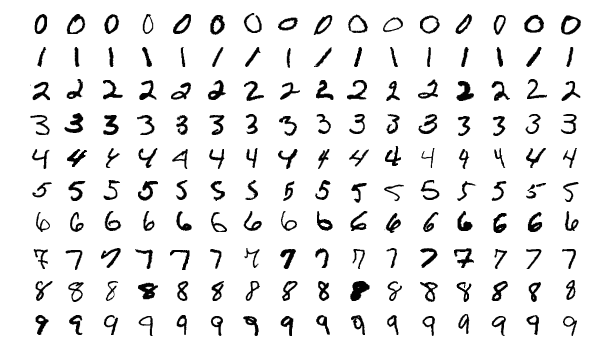

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#load data
df = pd.read_csv('https://bit.ly/3ilJc2C', compression='zip', delimiter=",")

#Extract input variables (all rows, all columns but last column)
X=(df.values[:10000,:-1]/255.0)

#Extract output variables (all rows, last column)
Y= df.values[:10000,-1]

In [3]:
#Get a count of each group to ensure samples are equitably balanced
print(df.groupby(["class"]).agg({"class" : [np.size]}))

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


In [4]:
#Seperate training and testing data
#Note that the 'stratify' parameter is used to ensure each class is proportionally represented in both sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=10, stratify=Y)


In [12]:
#Build and train the model

#from sklearn.model_selection import GridSearchCV

#Create an MLP-classifier
#SGD-stochastic gradient descent: learning approach which takes small random subsets of training data in each iteration
nn=MLPClassifier(solver='sgd', hidden_layer_sizes=(30,), activation='logistic', max_iter=300, learning_rate_init=.1)
nn.fit(X_train,Y_train)

print("MLP training set score: %f" %nn.score(X_train,Y_train))
print("MLP test set score: %f:" %nn.score(X_test, Y_test))



MLP training set score: 1.000000
MLP test set score: 0.940000:


In [6]:
Y_predict=nn.predict(X_test)
print(Y_test)

print(Y_predict)

[3 0 1 ... 5 3 6]
[3 0 1 ... 5 3 6]


Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(30,), (50,)],       #, (100,)],
    'activation': ['logistic'],                 #, 'tanh', 'relu'],
    'max_iter': [100, 200],                     #, 300],
    'learning_rate_init': [0.001, 0.01]         #, 0.1]
}

# Create an MLPClassifier
nn = MLPClassifier(solver='sgd', random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(nn, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the MLPClassifier with the best parameters
best_nn = MLPClassifier(solver='sgd', random_state=1, **best_params)
best_nn.fit(X_train, Y_train)

# Evaluate the best classifier on the test set
test_accuracy = best_nn.score(X_test, Y_test)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", test_accuracy)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 200}
Best Cross-Validation Score: 0.9188058106188567
Test Set Accuracy: 0.933939393939394


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluate classification results

Example: Binary classification task

Confusion Matrix and Metrics

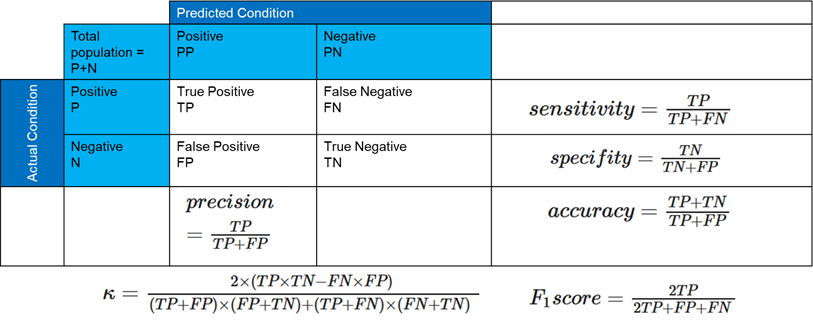

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predict)
print(matrix)

[[323   0   0   2   1   0   2   0   1   1]
 [  0 364   2   1   2   0   0   0   3   0]
 [  2   4 299   6   5   0   2   3   4   2]
 [  2   1   5 313   0   5   0   4   8   3]
 [  1   2   2   0 307   0   3   2   0   6]
 [  5   0   0   6   4 257   7   1   4   1]
 [  1   1   1   0   2   0 327   2   1   0]
 [  2   1   1   1   3   0   0 344   0   1]
 [  5   3   5   6   4   6   1   2 273   6]
 [  7   0   0   3   7   1   0   9   1 295]]


Calculate accuracy

In [17]:
# Make predictions using the model
Y_predict = nn.predict(X_test)

# Convert predicted values to class labels (e.g., using argmax for classification)
#predicted_labels = np.argmax(Y_predict, axis=1)

# Calculate the accuracy
correct_predictions = np.sum(Y_predict == Y_test)
total_samples = len(Y_test)
accuracy = correct_predictions / total_samples

# Calculate accuracy with scikit-function
from sklearn.metrics import accuracy_score
accuracy_sklearn = accuracy_score(Y_test, Y_predict)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Accuracy from scikit learn: {accuracy_sklearn * 100:.2f}%')

Accuracy: 94.00%
Accuracy from scikit learn: 94.00%


In [ ]:
# Kappa
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(Y_test, Y_predict)

print(f'Cohen\'s Kappa Score: {kappa_score}')

Cohen's Kappa Score: 0.9353145102233396


In [ ]:
# F1-score
from sklearn.metrics import f1_score

F1_score = f1_score(Y_test, Y_predict, average='micro')

print(f'F1 Score: {F1_score}')


F1 Score: 0.9418181818181818


Validation curves

In [ ]:
from sklearn.model_selection import validation_curve

param_name = "max_iter"
param_range = (0,10,20,30,40,50,60,70,80)

train_scores, test_scores = validation_curve(
    MLPClassifier(solver='sgd', hidden_layer_sizes=(30,), activation='logistic',learning_rate_init=.1),
    X,
    Y,
    param_name=param_name,
    param_range=param_range,
    cv=3,  # Specify the number of cross-validation folds
    scoring="accuracy",
    n_jobs=2,
)

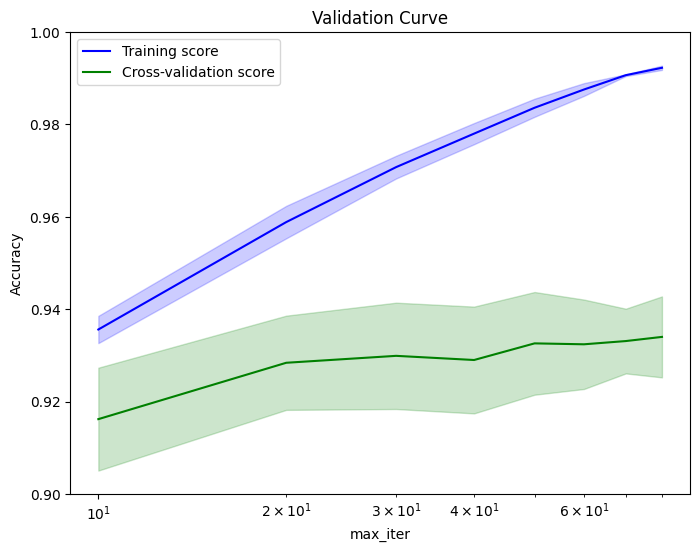

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Validation Curve")
plt.xlabel(param_name)
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.semilogx(param_range, np.mean(train_scores, axis=1), label="Training score", color="b")
plt.fill_between(
    param_range,
    np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
    np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
    alpha=0.2,
    color="b",
)
plt.semilogx(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="g")
plt.fill_between(
    param_range,
    np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
    np.mean(test_scores, axis=1) + np.std(test_scores, axis=1),
    alpha=0.2,
    color="g",
)
plt.legend(loc="best")
plt.show()

In [18]:
from sklearn.model_selection import validation_curve

param_name = "max_iter"
param_range = (0,10,20,30,40,50,60,70,80)

train_scores_2, test_scores_2 = validation_curve(
    MLPClassifier(solver='sgd', hidden_layer_sizes=(30,),alpha=0.01, activation='logistic',learning_rate_init=.1),
    X,
    Y,
    param_name=param_name,
    param_range=param_range,
    cv=3,  # Specify the number of cross-validation folds
    scoring="accuracy",
    n_jobs=2,
)

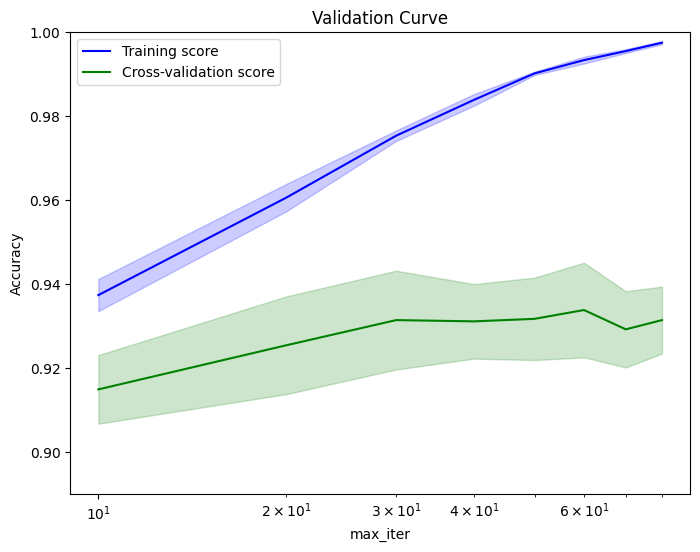

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Validation Curve")
plt.xlabel(param_name)
plt.ylabel("Accuracy")
plt.ylim(0.89, 1.0)
plt.semilogx(param_range, np.mean(train_scores_2, axis=1), label="Training score", color="b")
plt.fill_between(
    param_range,
    np.mean(train_scores_2, axis=1) - np.std(train_scores_2, axis=1),
    np.mean(train_scores_2, axis=1) + np.std(train_scores_2, axis=1),
    alpha=0.2,
    color="b",
)
plt.semilogx(param_range, np.mean(test_scores_2, axis=1), label="Cross-validation score", color="g")
plt.fill_between(
    param_range,
    np.mean(test_scores_2, axis=1) - np.std(test_scores_2, axis=1),
    np.mean(test_scores_2, axis=1) + np.std(test_scores_2, axis=1),
    alpha=0.2,
    color="g",
)
plt.legend(loc="best")
plt.show()

# Corrupted images

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from PIL import Image, ImageFilter
import cv2


In [124]:
# Define a function to apply camera-typical faults or corruptions
def apply_corruption(image):
    # Convert PIL Image to NumPy array
    image_array = np.array(image)

    # Add Gaussian noise
    noisy_image = image_array + np.random.normal(0,10, image_array.shape)

    # Apply motion blur (custom kernel)
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]]) / 1.0
    blurred_image = cv2.filter2D(image_array, -1, kernel)

  # Convert blurred_image back to PIL Image
    blurred_image_pil = Image.fromarray(np.uint8(blurred_image))

    return noisy_image, blurred_image

In [125]:
# Load the MNIST dataset (a smaller version) from scikit-learn
digits = datasets.load_digits()

# Prepare the data and labels
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Normalize the data to a range [0, 1]
X = X / 255.0


In [126]:
corrupted_images = []
for i in range(n_samples):
    # Convert each image to a PIL Image
    image_data = X[i].reshape(8, 8)
    image = Image.fromarray(np.uint8(image_data * 255))  # Rescale to 0-255 range

    # Apply corruption to the image
    noisy_image, blurred_image = apply_corruption(image)

    # Convert the corrupted images to NumPy arrays and append to the list
    noisy_image_array = np.array(noisy_image) / 255.0  # Rescale back to [0, 1]
    blurred_image_array = np.array(blurred_image) / 255.0  # Rescale back to [0, 1]

    corrupted_images.append((noisy_image_array, blurred_image_array))

# Convert the corrupted images list to a NumPy array
X_noisy = np.array([img[0].ravel() for img in corrupted_images])
X_blurred = np.array([img[1].ravel() for img in corrupted_images])


In [127]:
n_split = n_samples * 4 // 5
X_train, X_test = X[:n_split], X[n_split:]
X_train_noisy, X_test_noisy = X_noisy[:n_split], X_noisy[n_split:]
X_train_blurred, X_test_blurred = X_blurred[:n_split], X_blurred[n_split:]
y_train, y_test = y[:n_split], y[n_split:]


In [128]:
# Create an MLPClassifier (DNN) with one hidden layer for noisy images
clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

# Train the DNN classifier on the training data
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

In [129]:
# Create an MLPClassifier (DNN) with one hidden layer for noisy images
clf_noisy = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

# Train the DNN classifier on the training data
clf_noisy.fit(X_train_noisy, y_train)


MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

In [130]:
# Create an MLPClassifier (DNN) with one hidden layer for noisy images
clf_blurred = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

# Train the DNN classifier on the training data
clf_blurred.fit(X_train_blurred, y_train)


MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

In [131]:
accuracy = clf.score(X_test, y_test)
print(f"Image Test Accuracy: {accuracy*100:.2f}%")


Image Test Accuracy: 90.83%


In [132]:
accuracy_noisy = clf.score(X_test_noisy, y_test)
print(f"Noisy Image Test Accuracy: {accuracy_noisy*100:.2f}%")


Noisy Image Test Accuracy: 47.50%


In [133]:
accuracy_blurred = clf.score(X_test_blurred, y_test)
print(f"Blurred Image Test Accuracy: {accuracy_blurred*100:.2f}%")


Blurred Image Test Accuracy: 81.39%


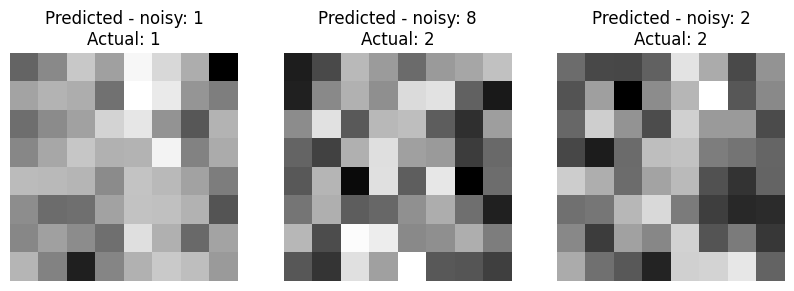

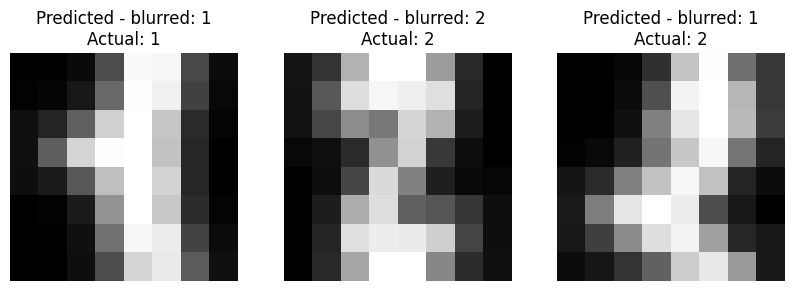

In [134]:
import random
import matplotlib.pyplot as plt

# Choose three random indices for the corrupted images
random_indices = random.sample(range(len(X_noisy)), 3)

# Create a figure to display the images and predictions
plt.figure(figsize=(10, 4))

for i, index in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)

    # Display the corrupted image - noisy
    corrupted_image_noisy = X_noisy[index].reshape(8, 8)
    plt.imshow(corrupted_image_noisy, cmap='gray')

    # Make a prediction using the trained DNN classifier
    predicted_class_noisy = clf.predict(X_noisy[index].reshape(1, -1))[0]

    # Display the predicted class and the actual class
    plt.title(f"Predicted - noisy: {predicted_class_noisy}\nActual: {y[index]}")
    plt.axis('off')

plt.show()

# Create a figure to display the images and predictions
plt.figure(figsize=(10, 4))

for i, index in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)

    # Display the corrupted image - blurred
    corrupted_image_blurred = X_blurred[index].reshape(8, 8)
    plt.imshow(corrupted_image_blurred, cmap='gray')

     # Make a prediction using the trained DNN classifier
    predicted_class_blurred = clf.predict(X_blurred[index].reshape(1, -1))[0]

    # Display the predicted class and the actual class
    plt.title(f"Predicted - blurred: {predicted_class_blurred}\nActual: {y[index]}")
    plt.axis('off')

plt.show()



